In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-11-26 23:42:00.344710: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 23:42:00.374652: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 23:42:00.374688: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 23:42:00.376029: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 23:42:00.382000: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 23:42:00.382576: I tensorflow/core/platform/cpu_feature_guard.cc:1

2.15.0


# Loading the Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Defining the class names

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploratory Data Analysis

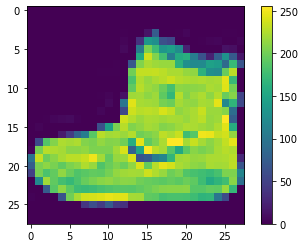

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

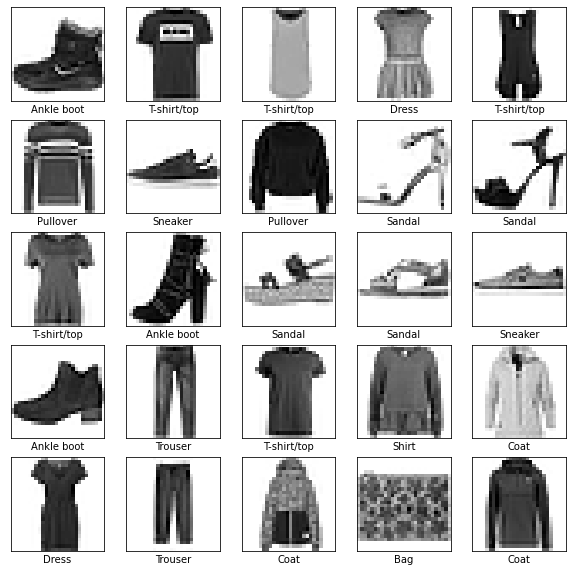

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Model Building

In [7]:
ANN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

CNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = ( 3, 3), input_shape =( 28, 28, 1), data_format="channels_last"),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = ( 3, 3), input_shape =( 28, 28, 1), data_format="channels_last"),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

2023-11-26 23:42:03.200257: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-26 23:42:03.200833: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Model Compiling

In [8]:
ANN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

CNN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
print("ANN Training")
ann_model = ANN.fit(train_images, train_labels, epochs = 4)

print("\nCNN Training")
train_images_CNN = tf.reshape(train_images, shape=[-1,28,28,1])
cnn_model = CNN.fit(train_images_CNN, train_labels, epochs = 3)

ANN Training
Epoch 1/4
1875/1875 [==============================] - 2s 964us/step - loss: 0.5635 - accuracy: 0.8020
Epoch 2/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4374 - accuracy: 0.8419
Epoch 3/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3986 - accuracy: 0.8556
Epoch 4/4
1875/1875 [==============================] - 2s 971us/step - loss: 0.3794 - accuracy: 0.8609

CNN Training
Epoch 1/3


2023-11-26 23:42:11.781383: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


1875/1875 [==============================] - 32s 17ms/step - loss: 0.4447 - accuracy: 0.8400
Epoch 2/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3338 - accuracy: 0.8775
Epoch 3/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2892 - accuracy: 0.8937


# Accuracy

In [10]:
test_loss, test_acc = ANN.evaluate(test_images,  test_labels, verbose=2)
test_images_CNN = tf.reshape(test_images, shape=[-1,28,28,1])
test_loss_CNN, test_acc_CNN = CNN.evaluate(test_images_CNN,  test_labels, verbose=2)

print('\nTest accuracy (ANN):', test_acc)
print('\nTest accuracy (CNN):', test_acc_CNN)

313/313 - 0s - loss: 0.3715 - accuracy: 0.8637 - 230ms/epoch - 734us/step
313/313 - 2s - loss: 0.3638 - accuracy: 0.8723 - 2s/epoch - 7ms/step

Test accuracy (ANN): 0.8636999726295471

Test accuracy (CNN): 0.8723000288009644


# Predictions

In [11]:
probability_model = tf.keras.Sequential([ANN, tf.keras.layers.Softmax()])
probability_model_CNN = tf.keras.Sequential([CNN, tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)
predictionsCNN = probability_model.predict(test_images_CNN)

313/313 [==============================] - 0s 608us/step


# Graphing

In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

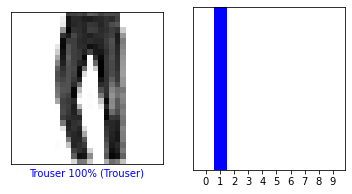

In [14]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

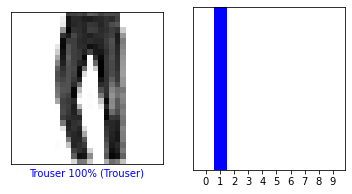

In [15]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictionsCNN[i], test_labels, test_images_CNN)
plt.subplot(1,2,2)
plot_value_array(i, predictionsCNN[i],  test_labels)
plt.show()

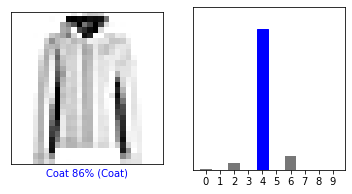

In [16]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

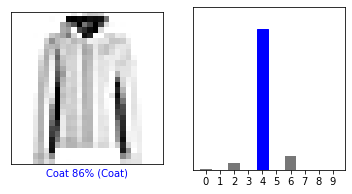

In [17]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictionsCNN[i], test_labels, test_images_CNN)
plt.subplot(1,2,2)
plot_value_array(i, predictionsCNN[i],  test_labels)
plt.show()

Output of multiple images' accuracies on both the models

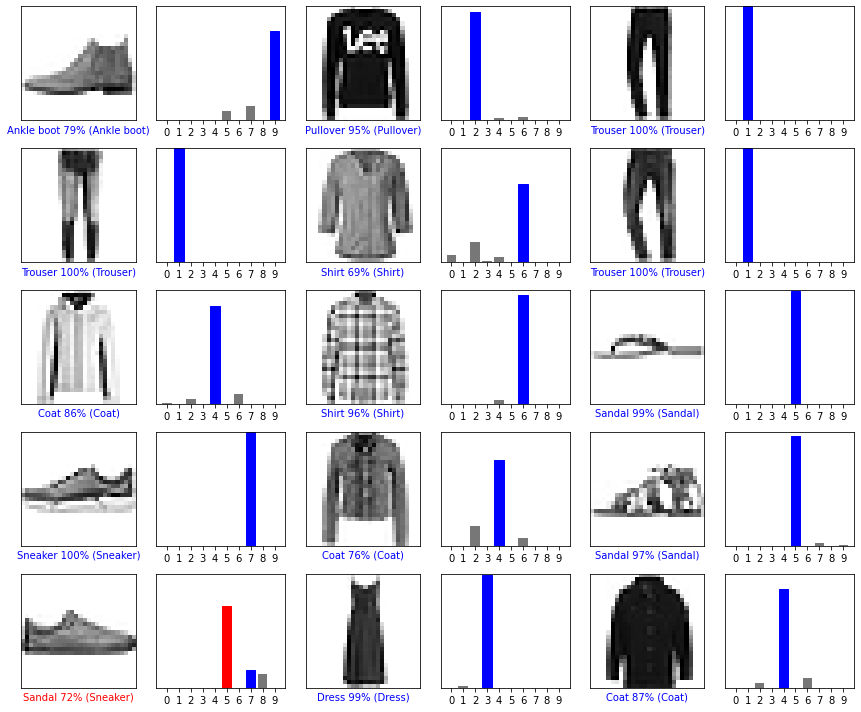

In [18]:
# Blue = correct prediction and red = incorrect predictions 
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

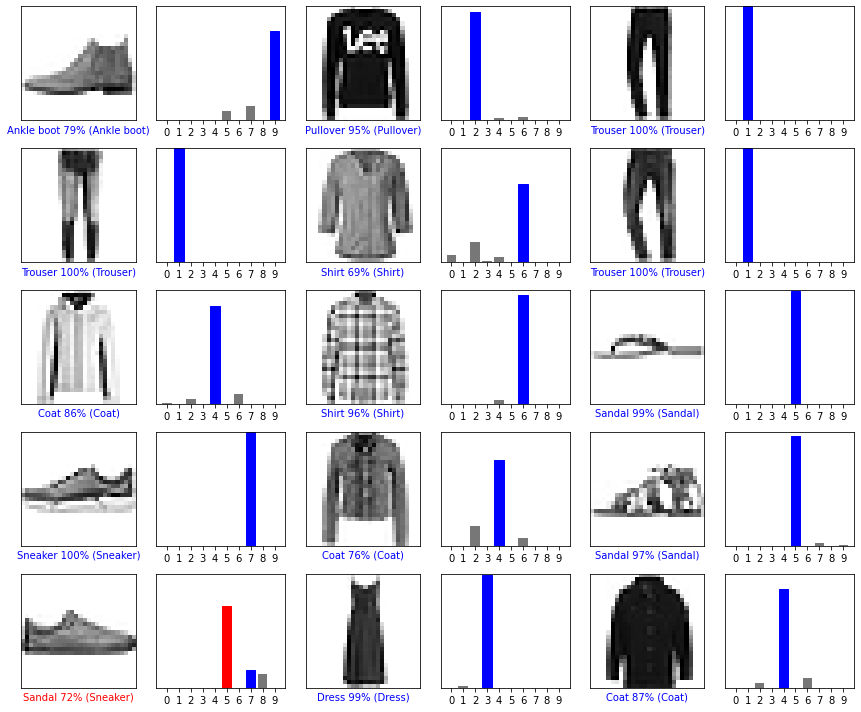

In [19]:
# Blue = correct prediction and red = incorrect predictions 
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictionsCNN[i], test_labels, test_images_CNN)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictionsCNN[i], test_labels)
plt.tight_layout()
plt.show()

In [20]:
# Let's take an image from the test dataset
img = test_images[1]
imgCNN = tf.reshape(img, shape=[-1,28,28,1])
img = (np.expand_dims(img,0))

In [21]:
predictions_single = probability_model.predict(img)
predictions_single_CNN = probability_model_CNN.predict(imgCNN)
print(predictions_single)
print(predictions_single_CNN)

1/1 [==============================] - 0s 46ms/step
[[1.0612589e-04 8.8520675e-09 9.5306355e-01 5.5551362e-07 2.0452928e-02
  9.6920605e-13 2.6376093e-02 4.6173378e-12 7.5959986e-07 2.0571359e-11]]
[[2.8748833e-05 2.1095669e-07 9.8810232e-01 1.1564986e-07 5.0333315e-03
  1.0885023e-14 6.8352525e-03 2.1155679e-21 8.9212264e-09 1.4491483e-17]]


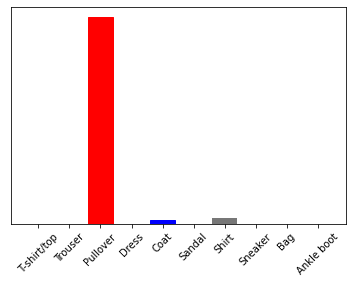

In [22]:
plot_value_array(6, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

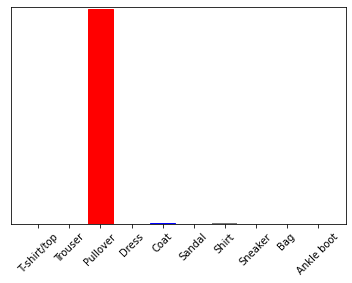

In [23]:
plot_value_array(6, predictions_single_CNN[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

### How many neurons does the hidden layer have in the given ANN?
The given ANN model has 128 neurons in the hidden layer.

### Try different numbers of neurons and report how the results change. Also try dropout (with different values) and report its impacts on the performance of the model.

After trying different number of neurons like 32, 64, and 128, there doesn't seem a dramatic difference in final predictions. However, with various dropout values such as .25, .2, .15, and .3 there is significant change in the accuracy values.

### Try to implement a CNN based on the given ANN, by adding two convolution layers before the fully connected hidden layer and test different settings (e g., number/size of filters). Summarize the experiments you have tried and results you get.

Generally, we can expect dramatic changes based on the number of filters and size of filters because these can adjust how much of the detail in the features are captured. What I find is that when filters/kernels of 3x3 were used, the accuracy scores were higher than 5x5. But it's also possible that the adjustment of filter sizes is affecting the model's complexity and as a result the accuracies were changing. Another interesting observation was the time taken with a 3x3 kernel size was much more than a 5x5. Taking a 2x2 will without a doubt capture much more finer detail, but the computational requirements for training such a model would be so much higher. We'd need to perform it on multiple GPUs with parallel processing to see outputs on such models. The best thing to do would be to consider how much detailed you want the model to be for your purpose and then choose the filter and hidden layer sizes, otherwise we would be wasting too much time prototyping for a good model. But what I've been able to infer is that with some experimentation on the needed level, we can produce a model that is excellent for our purposes.

### Prepare learning curve plots (loss vs epoch, and accuracy vs epoch) for both ANN and CNN, and write a brief a summary of what you learn from the learning curves.

(Refer to the plots below for graph output) From these plots what we can learn is that only in the first 2 epochs of both the models is there a significant improvement in their accuracies. This does not mean that there is absolutely no use to doing more epochs. In our case, we are just trying to make the model tell what clothing item it's being shown. However, if we were to make a model check if a person has malignant or benign breast cancer tumour, then it's worthwhile to do more epochs to increase the accuracy in the thousandths place. So for our problem it's good enough to stop with a few epochs especially my laptop's computational limitations. 

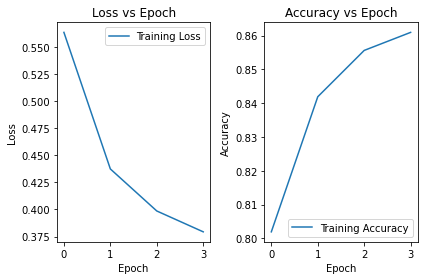

In [31]:
plt.subplot(1, 2, 1)
plt.plot(ann_model.history['loss'], label='Training Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# Plotting accuracy vs epoch
plt.subplot(1, 2, 2)
plt.plot(ann_model.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


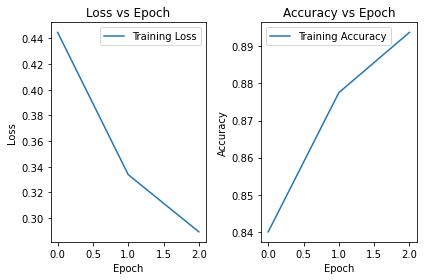

In [32]:
plt.subplot(1, 2, 1)
plt.plot(cnn_model.history['loss'], label='Training Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy vs epoch
plt.subplot(1, 2, 2)
plt.plot(cnn_model.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
